# Cardiovascular Disease Exploratory Data Analysis

### Imports

In [1]:
### Data manipulation 
import pandas                   as pd
import numpy                    as np

### Data visualization
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt

### Other libraries
import warnings

### Settings

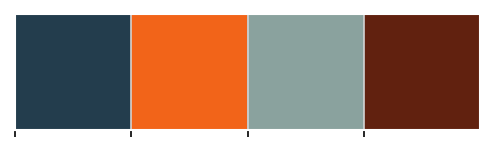

In [2]:
### Ignoring warnings
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['figure.titlesize']    = 25
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['font.size']           = 12
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

### Palette Seting
cardio_palette = ['#233D4D', '#F26419', '#8AA29E', '#61210F']
kde_palette = ['#233D4D', '#61210F']
sns.set_palette(sns.color_palette(cardio_palette))
sns.palplot(sns.color_palette(cardio_palette))

### Function

In [3]:
def set_image(fig, title, xlabel, ylabel, xrotation=0, yrotation=0):
    """
    Summary: This function sets the image configuration.

    Args:
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
        rotation: the rotation of the labels. default as 0.

    Returns: None
    """

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xticks(rotation=xrotation)
    plt.yticks(rotation=yrotation)
    plt.tick_params(left=False, bottom=False)

    return fig

### Data

In [4]:
data = pd.read_csv('../data/interim/cardio_interim.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.000,110,80,1,1,0,0,1,0
1,1,55,1,156,85.000,140,90,3,1,0,0,1,1
2,2,51,1,165,64.000,130,70,3,1,0,0,0,1
3,3,48,2,169,82.000,150,100,1,1,0,0,1,1
4,4,47,1,156,56.000,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,99991,53,1,172,70.000,130,90,1,1,0,0,1,1
60652,99992,57,1,165,80.000,150,80,1,1,0,0,1,1
60653,99993,52,2,168,76.000,120,80,1,1,1,0,1,0
60654,99998,61,1,163,72.000,135,80,1,2,0,0,0,1


## Exploratory Data Analysis

### At what age people with cardiovascular disease outnumber people without cardiovascular disease? Are older people more at risk?

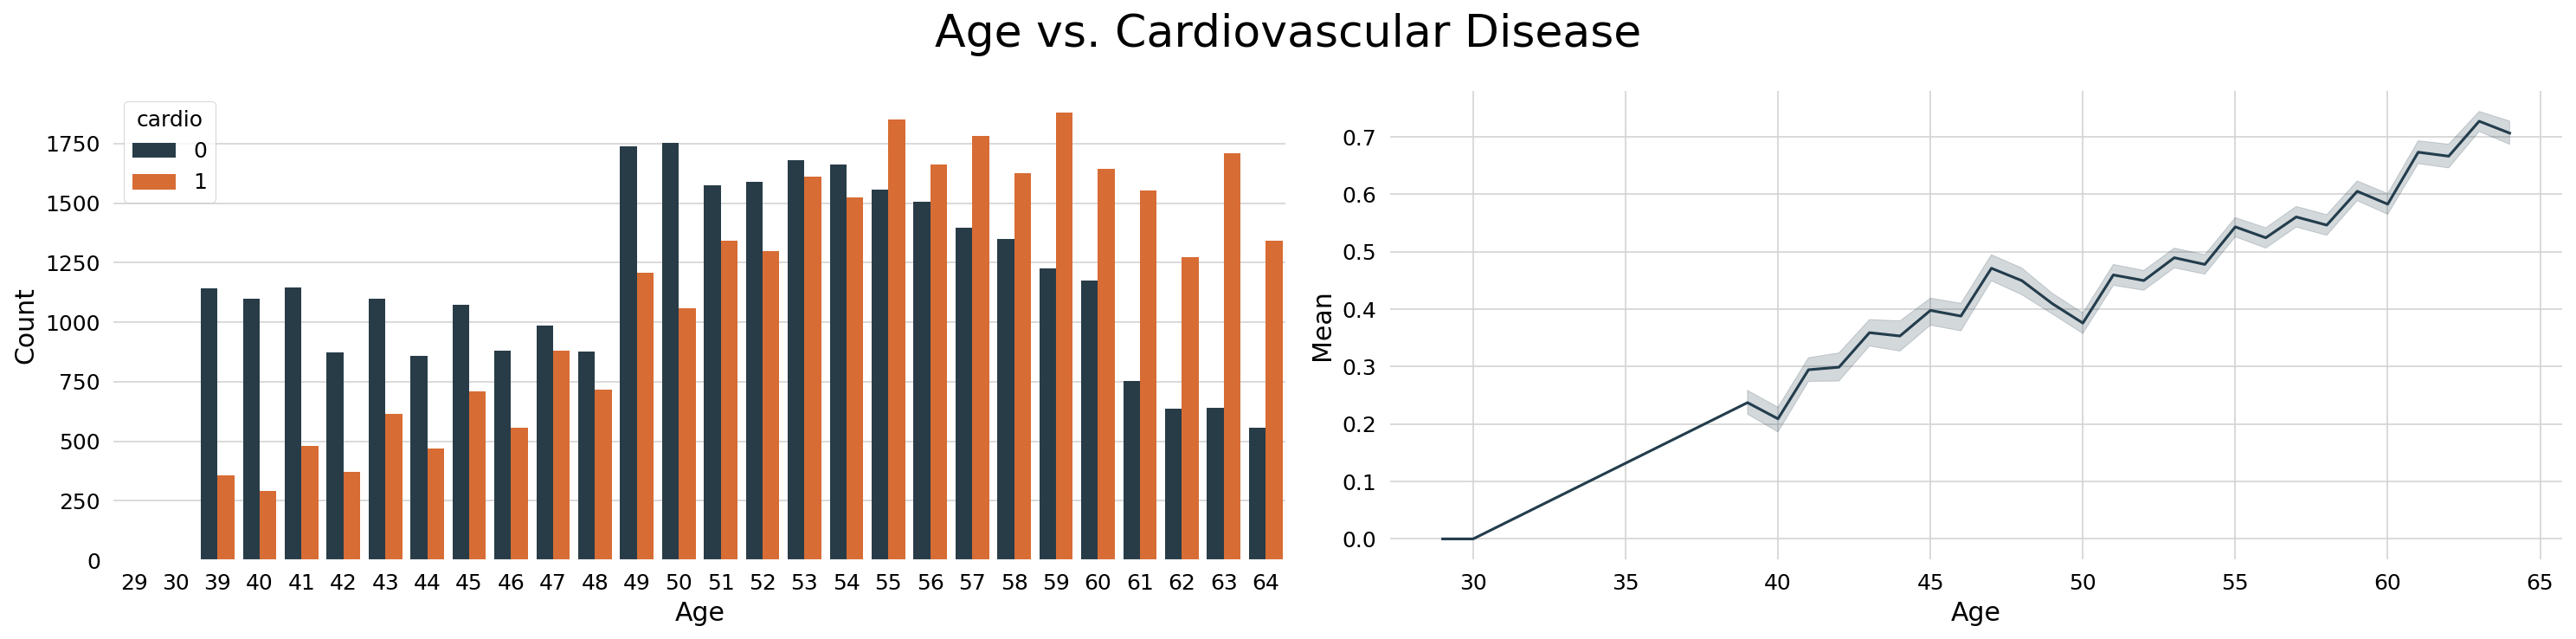

In [5]:
# Creating Figure
fig_01, axes = plt.subplots(1, 2)

# Plot 1
plt.subplot(1, 2, 1)
fig_011 = sns.countplot(data=data, x='age', hue='cardio')
fig_011 = set_image(fig_011, None, 'Age', 'Count')

# Plot 2
plt.subplot(1, 2, 2)
fig_012 = sns.lineplot(data=data, x='age', y='cardio', estimator='mean')
fig_012 = set_image(fig_012, None, 'Age', 'Mean')

# Main Title
fig_01.suptitle('Age vs. Cardiovascular Disease')

# Adjusting Spacing
fig_01.tight_layout()

### How is the distribution of variables: `gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`?

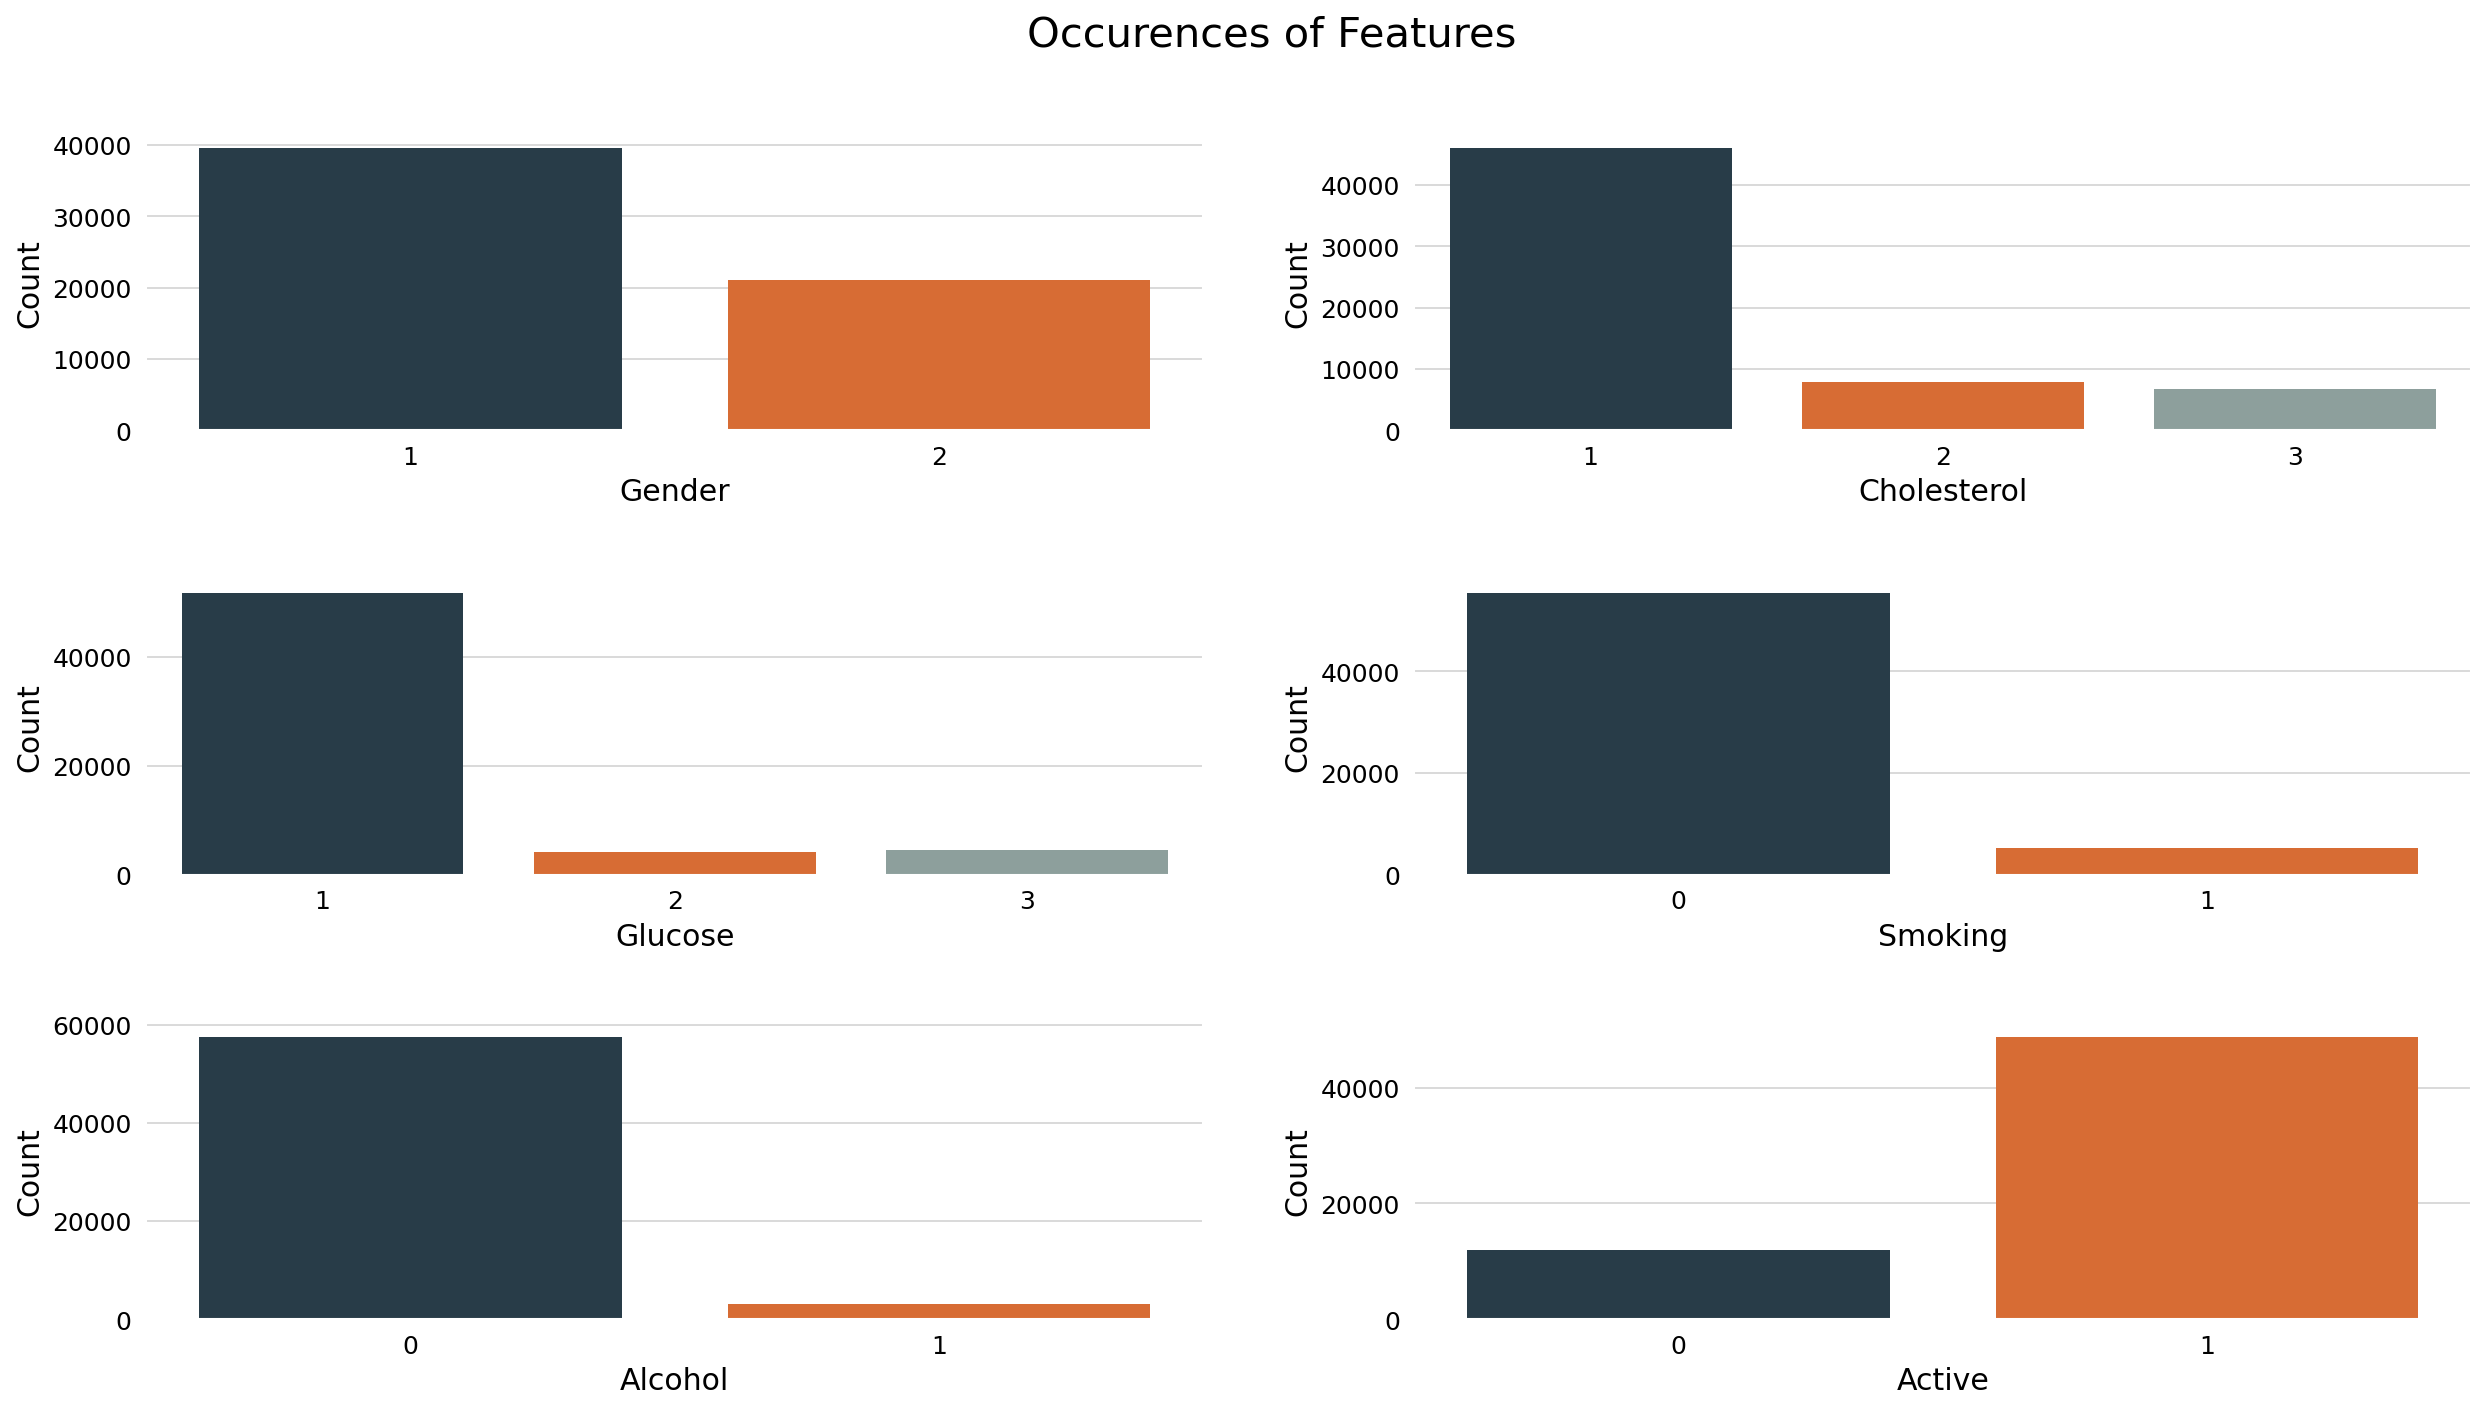

In [6]:
# Creating Figure
fig_02, axes = plt.subplots(3, 2, figsize=(20, 10))

# Plot 1
plt.subplot(3, 2, 1)
fig_021 = sns.countplot(data=data, x='gender')
fig_021 = set_image(fig_021, None, 'Gender', 'Count')

# Plot 2
plt.subplot(3, 2, 2)
fig_022 = sns.countplot(data=data, x='cholesterol')
fig_022 = set_image(fig_022, None, 'Cholesterol', 'Count')

# Plot 3
plt.subplot(3, 2, 3)
fig_023 = sns.countplot(data=data, x='gluc')
fig_023 = set_image(fig_023, None, 'Glucose', 'Count')

# Plot 4
plt.subplot(3, 2, 4)
fig_024 = sns.countplot(data=data, x='smoke')
fig_024 = set_image(fig_024, None, 'Smoking', 'Count')

# Plot 5
plt.subplot(3, 2, 5)
fig_025 = sns.countplot(data=data, x='alco')
fig_025 = set_image(fig_025, None, 'Alcohol', 'Count')

# Plot 6
plt.subplot(3, 2, 6)
fig_026 = sns.countplot(data=data, x='active')
fig_026 = set_image(fig_026, None, 'Active', 'Count')

# Main Title
fig_02.suptitle('Occurences of Features', fontsize=20)

# Adjusting Spacing
fig_02.subplots_adjust(top=0.9, hspace=0.5)

### The higher the cholesterol, the greater the risk?

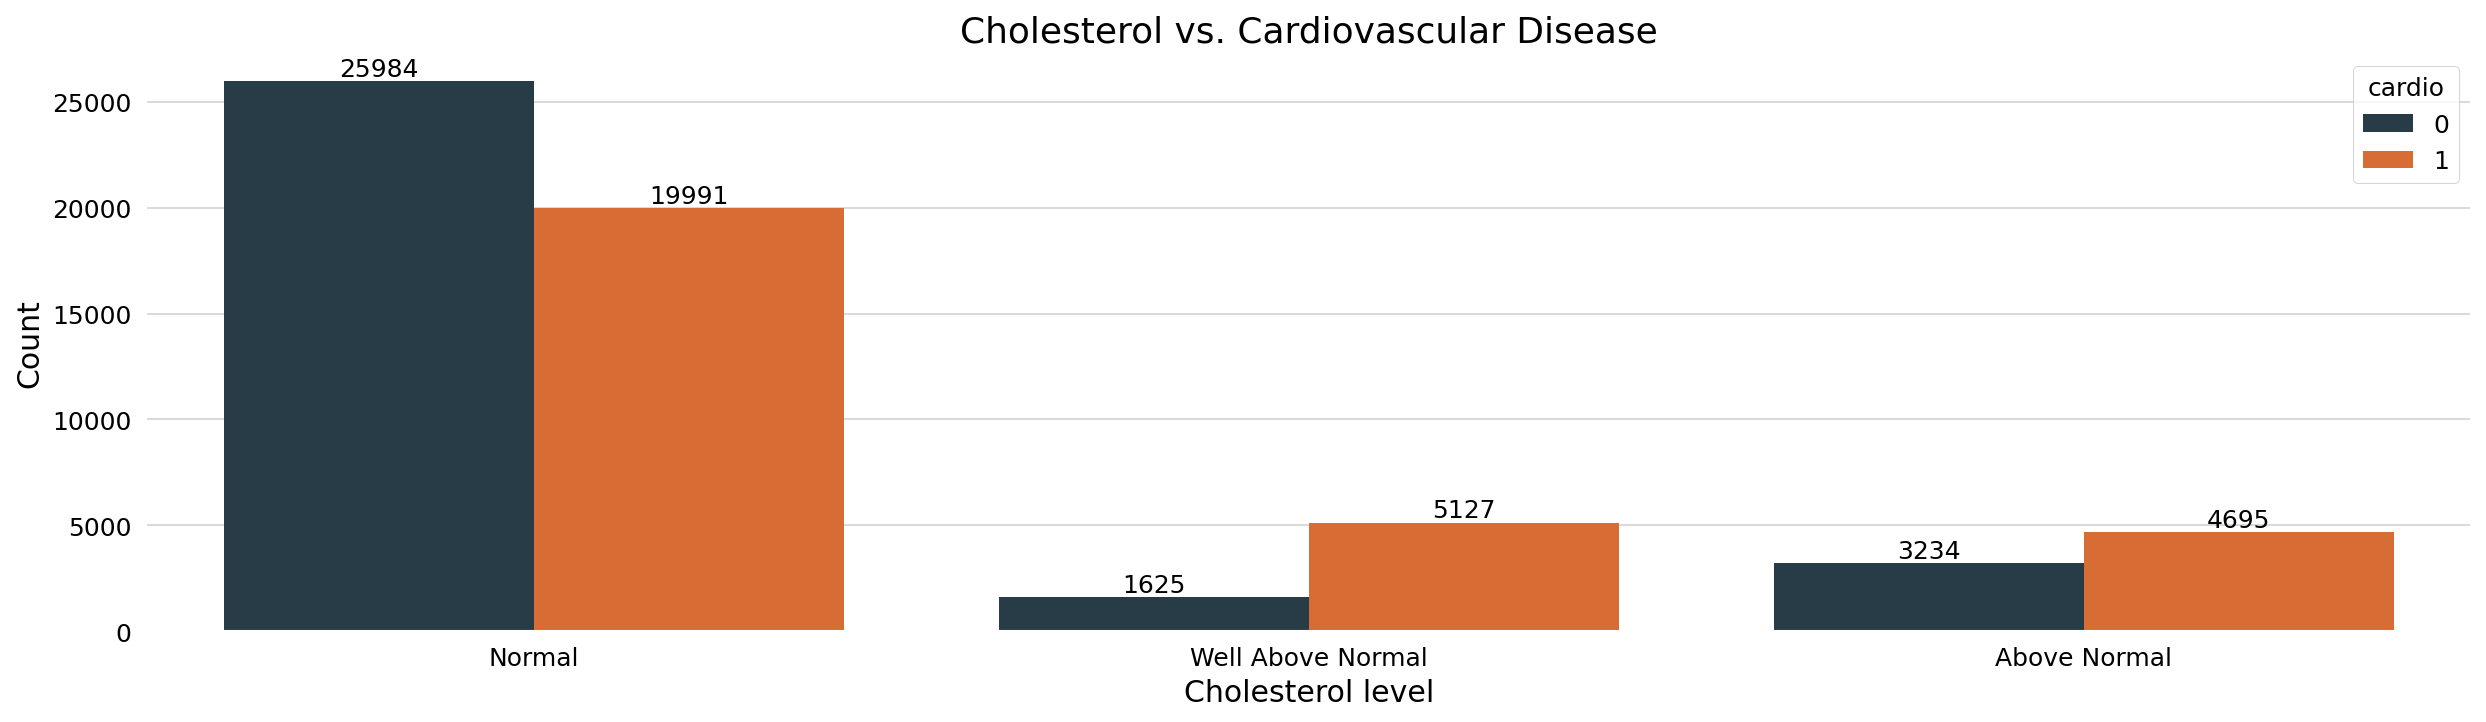

In [7]:
# Data Manipulation
chol = data[['cholesterol', 'cardio']]

mapping = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
chol['cholesterol'] = chol['cholesterol'].map(mapping)

# Creating Figure
fig_03 = sns.countplot(data=chol, x='cholesterol', hue='cardio')

# Customizing Figure
fig_03 = set_image(fig_03, 'Cholesterol vs. Cardiovascular Disease', 'Cholesterol level', 'Count')

for i in fig_03.containers:
    fig_03.bar_label(i)

### The higher the glucose, the higher the risk?

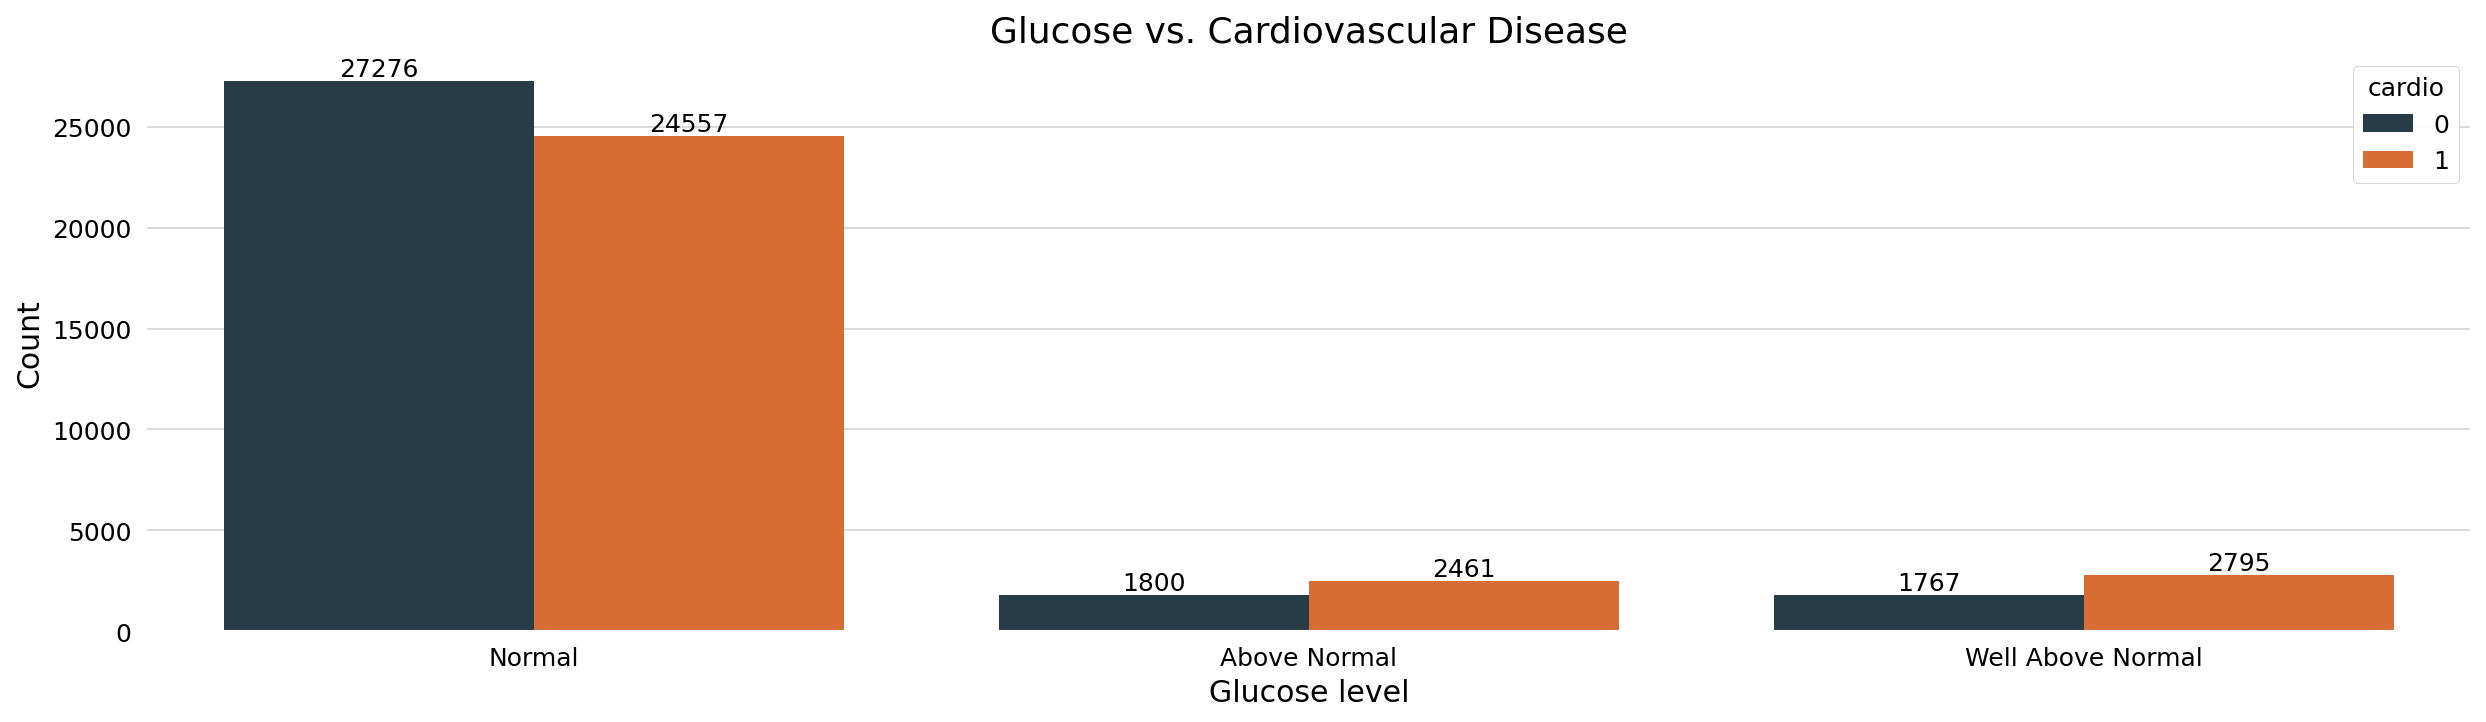

In [8]:
# Data Manipulation
gluc = data[['gluc', 'cardio']]

mapping = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
gluc['gluc'] = gluc['gluc'].map(mapping)

# Creating Figure
fig_04 = sns.countplot(data=gluc, x='gluc', hue='cardio')

# Customizing Figure
fig_04 = set_image(fig_04, 'Glucose vs. Cardiovascular Disease', 'Glucose level', 'Count')

for i in fig_04.containers:
    fig_04.bar_label(i)

### The taller the person, the greater the risk?

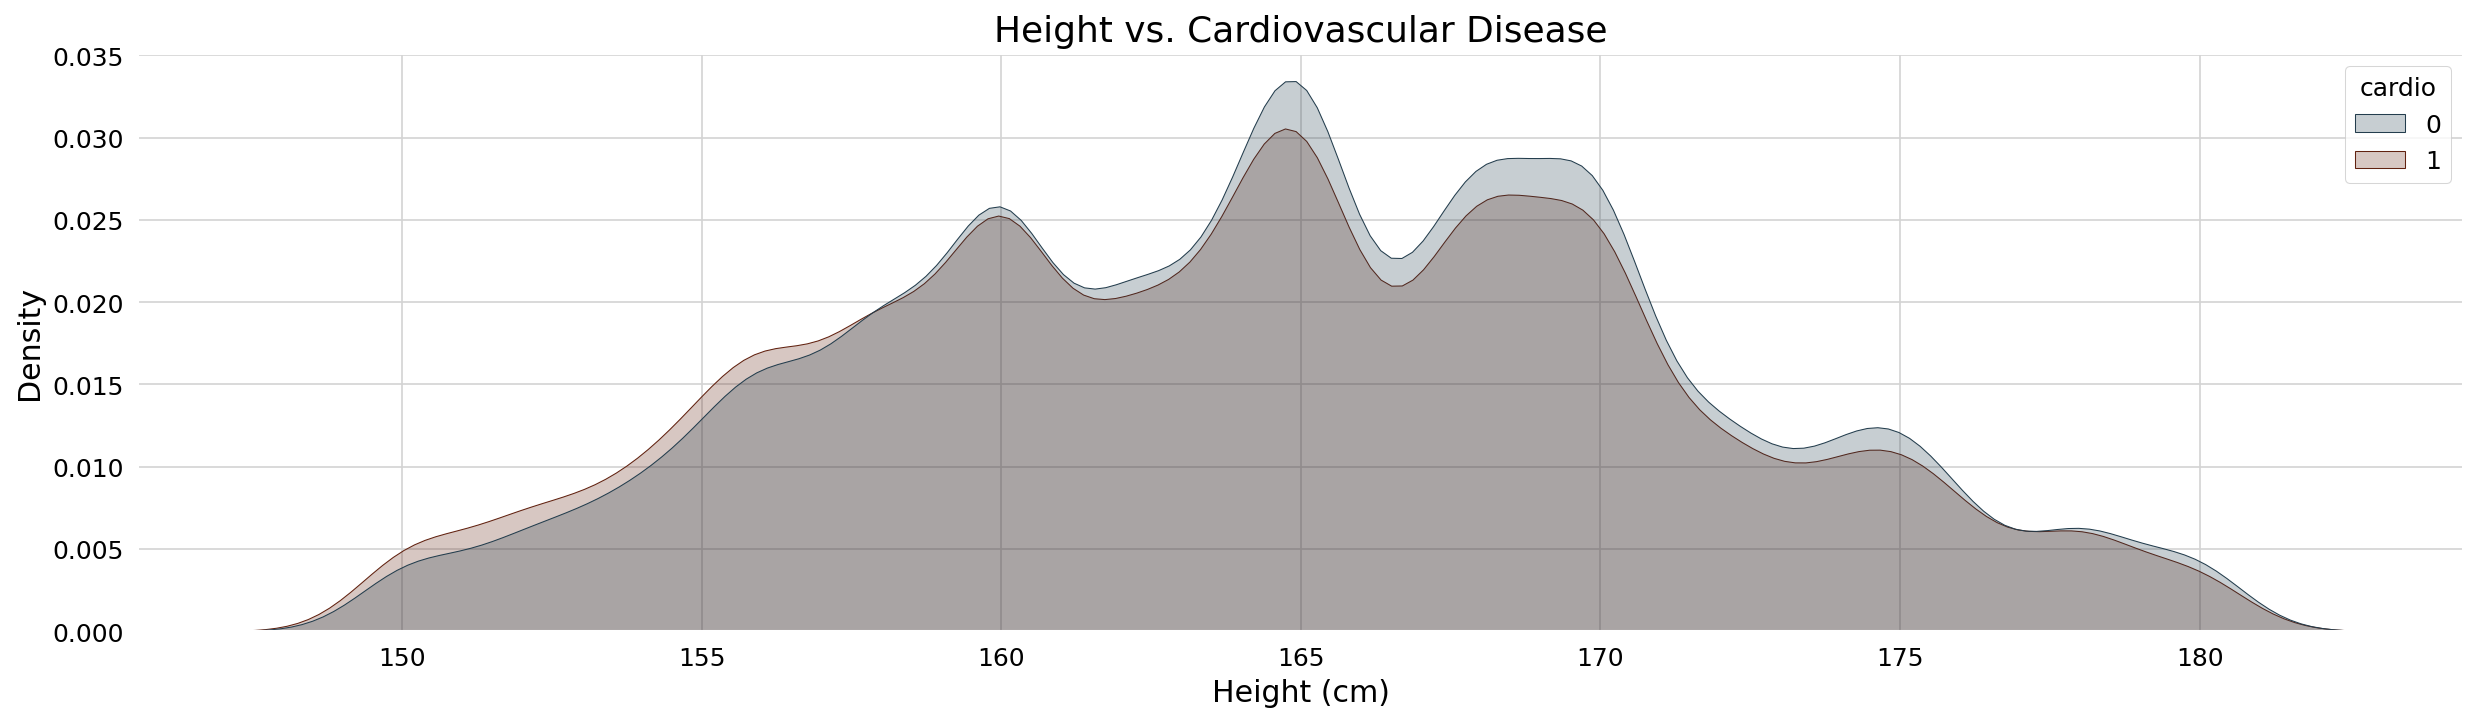

In [9]:
# Creating Figure
fig_05 = sns.kdeplot(data=data, x='height', hue='cardio', palette=kde_palette, fill=True)

# Customizing Figure
fig_05 = set_image(fig_05, 'Height vs. Cardiovascular Disease', 'Height (cm)', 'Density')

### Distribution of `age`, `height` and `weight` filtered by `gender`.

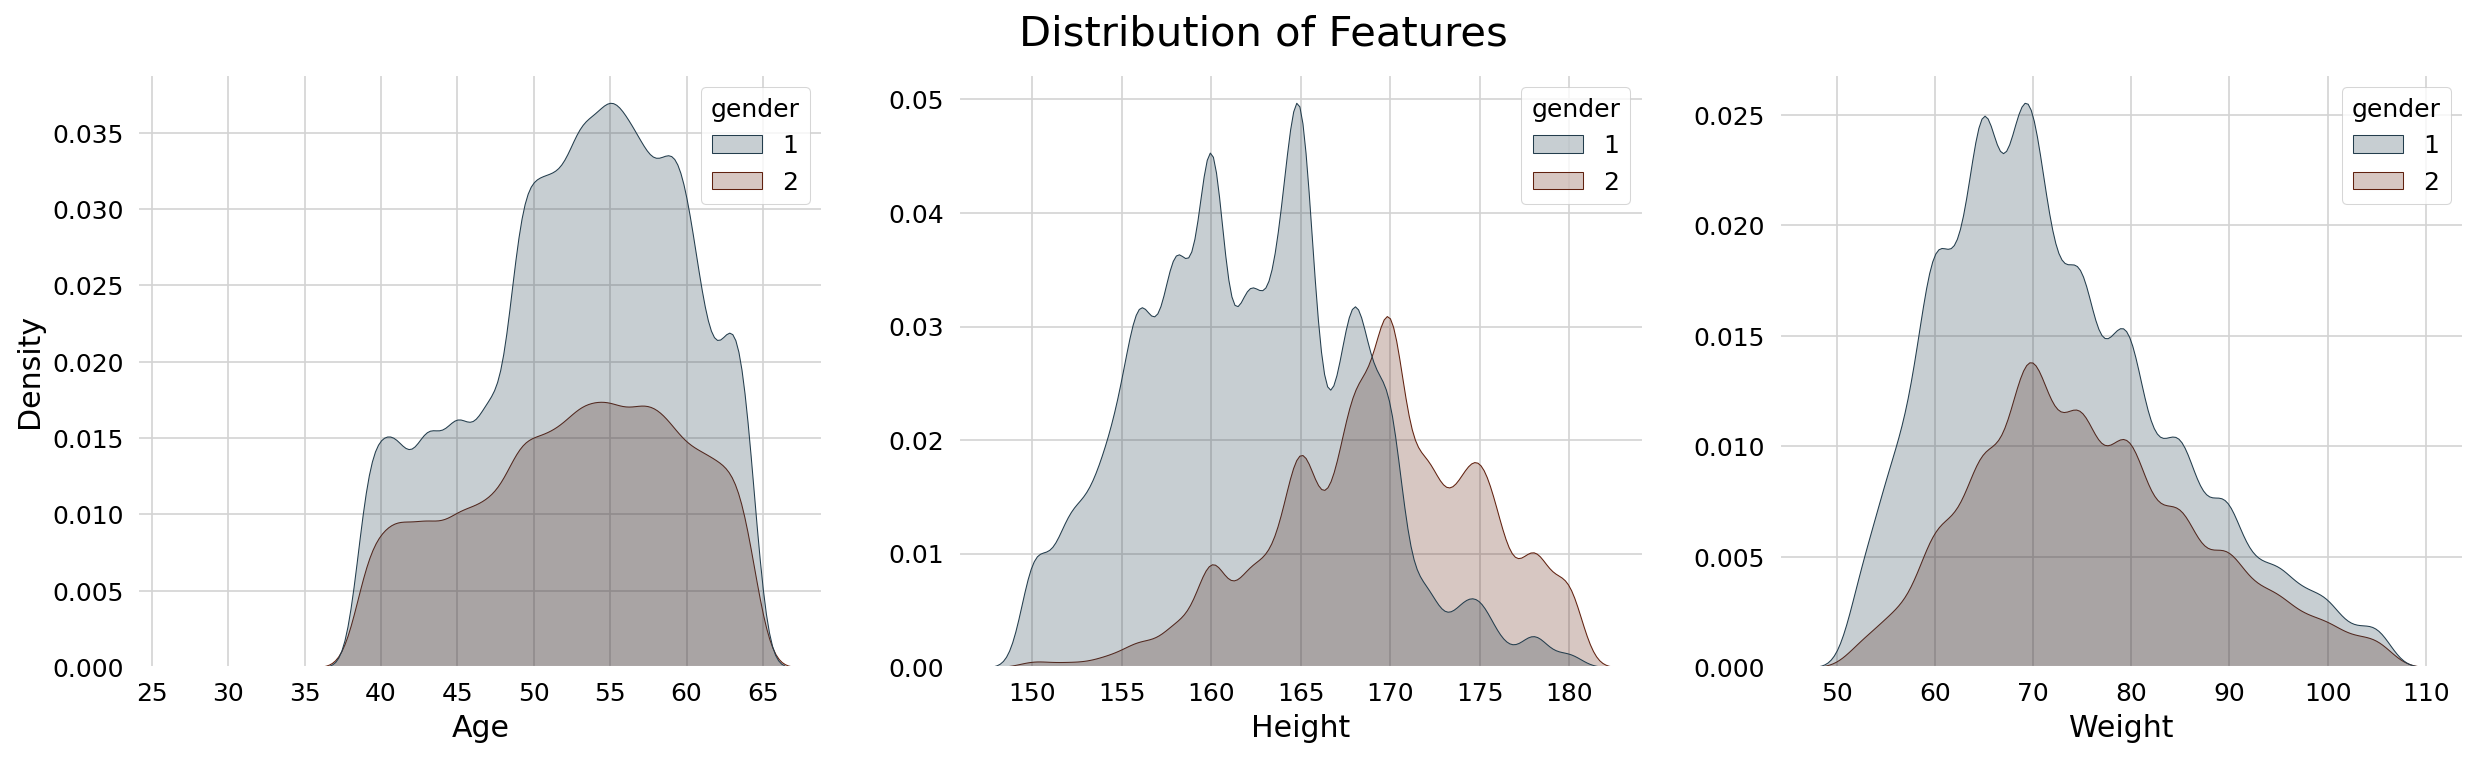

In [10]:
# Creating Figure
fig_06, axes = plt.subplots(1, 3)

# Plot 1
plt.subplot(1, 3, 1)
fig_061 = sns.kdeplot(data=data, x='age', hue='gender', palette=kde_palette, fill=True)
fig_061 = set_image(fig_061, None, 'Age', 'Density')

# Plot 2
plt.subplot(1, 3, 2)
fig_062 = sns.kdeplot(data=data, x='height', hue='gender', palette=kde_palette, fill=True)
fig_062 = set_image(fig_062, None, 'Height', None)

# Plot 3
plt.subplot(1, 3, 3)
fig_063 = sns.kdeplot(data=data, x='weight', hue='gender', palette=kde_palette, fill=True)
fig_063 = set_image(fig_063, None, 'Weight', None)

# Main Title
fig_06.suptitle('Distribution of Features', fontsize=20)

# Adjusting Spacing
fig_06.subplots_adjust(top=0.9)

### Which gender: consumes more alcohol, is more active and smoke more?

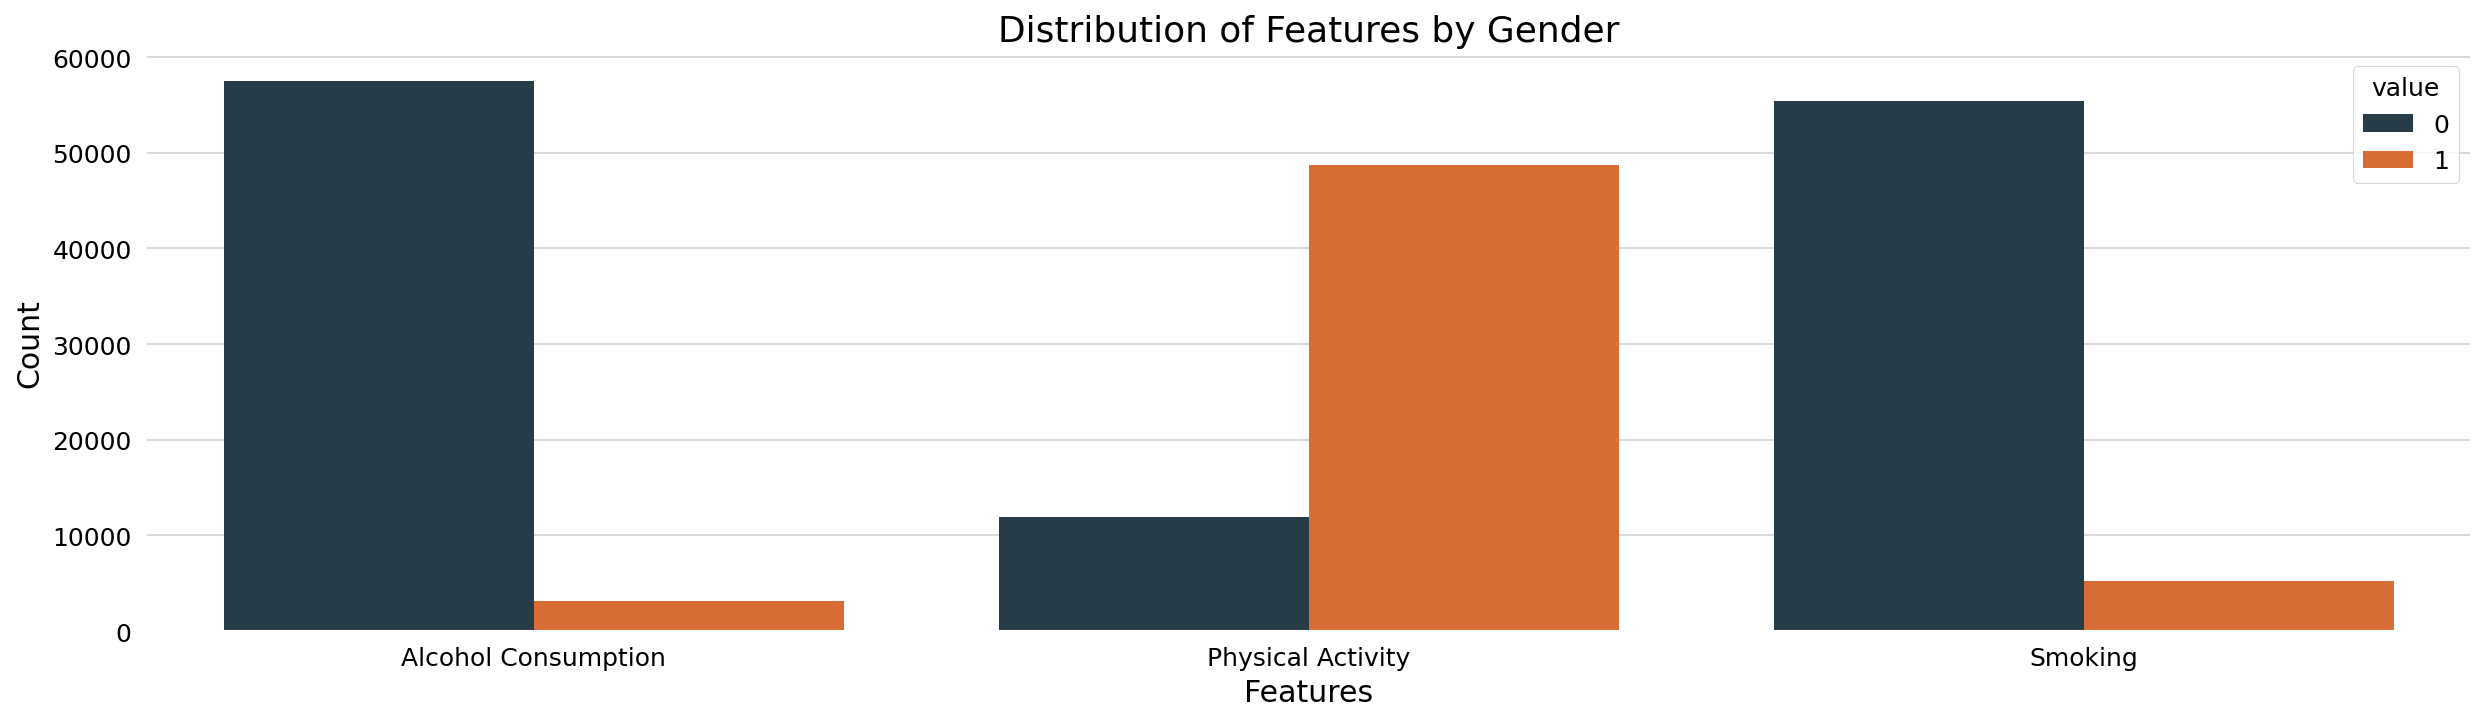

In [11]:
# Melted data for long-form representation
melted_data = data.melt(id_vars=['gender'], value_vars=['alco', 'active', 'smoke'])

# Stacked bar plot
fig_07 = sns.countplot(x='variable', hue='value', data=melted_data)

# Customizing Figure
fig_07 = set_image(fig_07, 'Distribution of Features by Gender', 'Features', 'Count')

# Changing the labels
feature_names = {'alco': 'Alcohol Consumption', 'active': 'Physical Activity', 'smoke': 'Smoking'}
plt.xticks(ticks=range(3), labels=[feature_names[var] for var in melted_data['variable'].unique()]);

### What is the distribution on cardiovascular disease and gender?

In [12]:
pd.crosstab(data['cardio'], data['gender'], normalize=True)

gender,1,2
cardio,,
0,0.331,0.178
1,0.322,0.170


| Cardio | Gender | Pctg. | 
|--------|--------|-------|
| 0      | Female | 0.331 | 
| 0      | Male   | 0.178 | 
| 1      | Female | 0.322 | 
| 1      | Male   | 0.170 | 

- A lower percentage of men have cardiovascular disease compared to women (17.0% vs. 32.2%)

### What is the distribution on cardiovascular disease and activeness?

In [13]:
pd.crosstab(data['cardio'], data['active'], normalize=True)

active,0,1
cardio,,
0,0.092,0.416
1,0.104,0.387


| Cardio | Active | Pctg. | Results |
|--------|--------|-------|---------|
| 0      | 0      | 0.092 | Less than 1% of the dataset is not active and does not have cardiovascular problem  |
| 0      | 1      | 0.416 | More than 40% of the dataset is active and does not have cardiovascular problem |
| 1      | 0      | 0.104 | Around 1% have a cardio issue and is not active |
| 1      | 1      | 0.387 | Almost 40% is active and have a cardio issue |

- It is uncommon to be inactive and not have a cardiovascular problem (less than 1%)

### Age vs. Blood Pressures

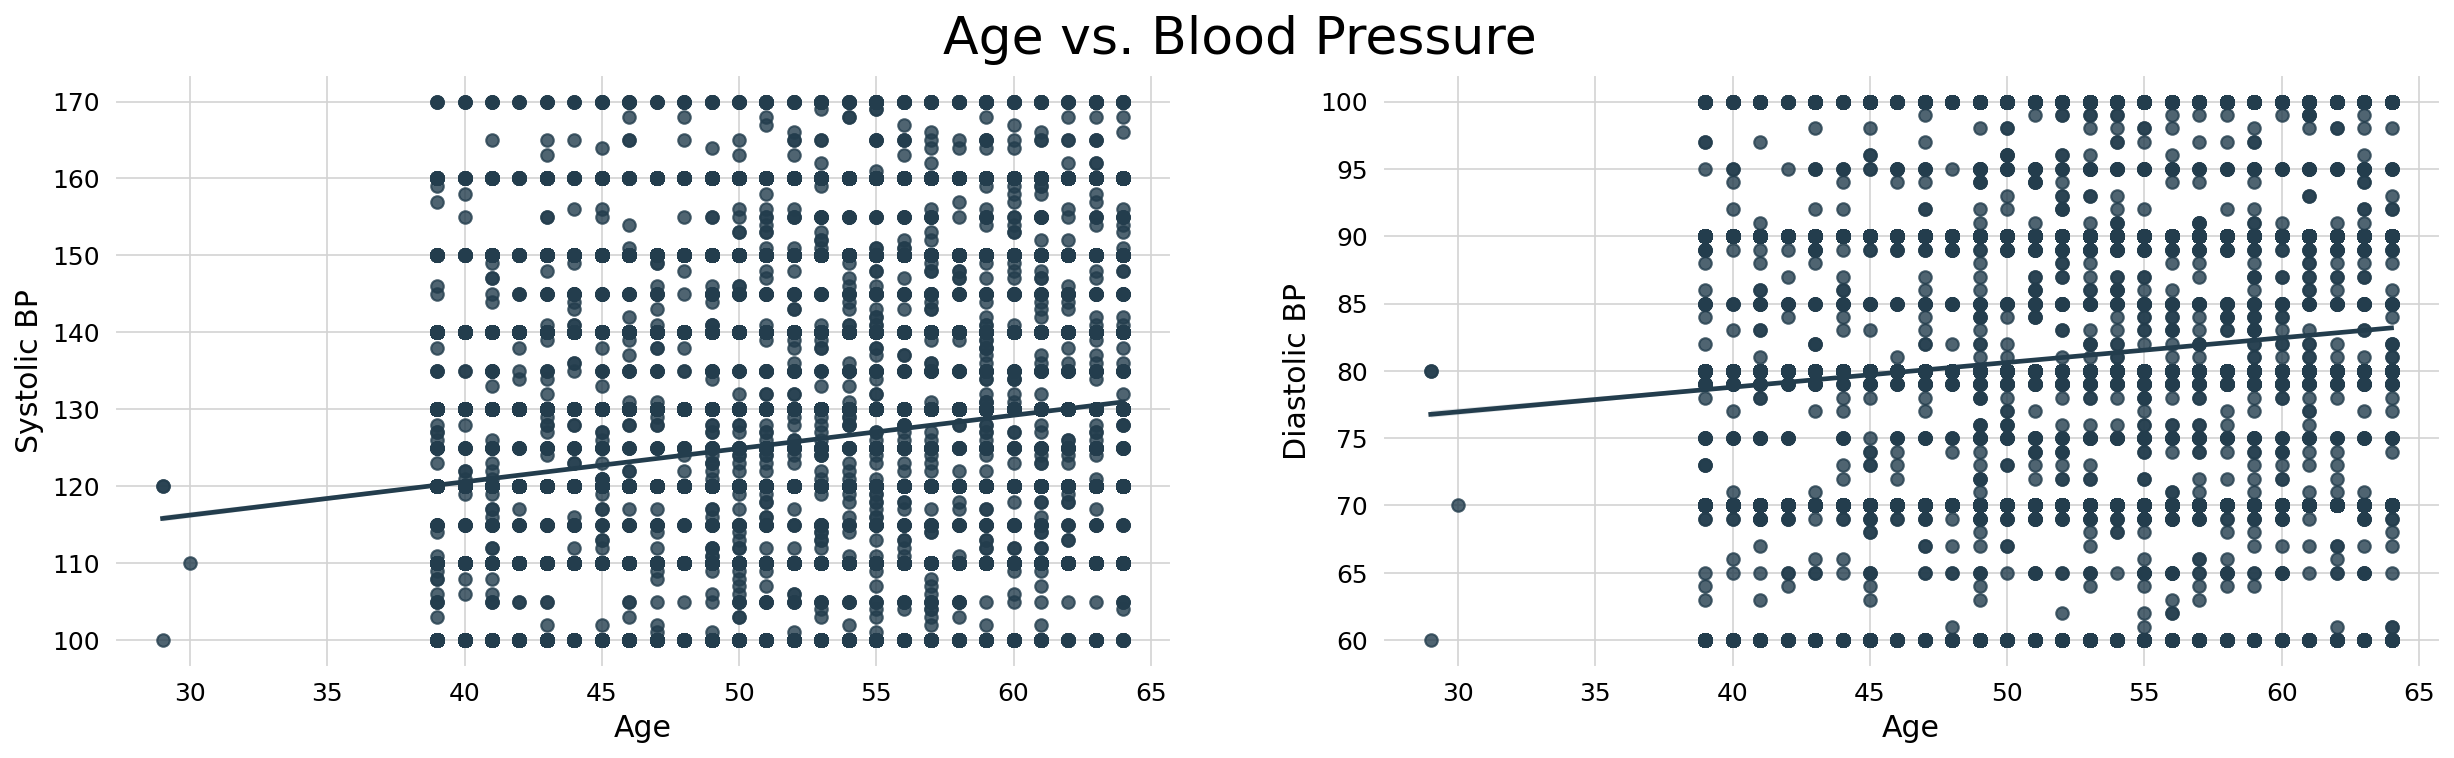

In [14]:
# Creating Figure
fig_10, axes = plt.subplots(1, 2)

# Plot 1
plt.subplot(1, 2, 1)
fig_101 = sns.regplot(data=data, x='age', y='ap_hi')
fig_101 = set_image(fig_101, None, 'Age', 'Systolic BP')

# Plot 2
plt.subplot(1, 2, 2)
fig_102 = sns.regplot(data=data, x='age', y='ap_lo')
fig_102 = set_image(fig_102, None, 'Age', 'Diastolic BP')

# Main Title
fig_10.suptitle('Age vs. Blood Pressure')

# Adjusting Spacing
fig_10.subplots_adjust(top=0.9)

### Weight vs. Glucose ?

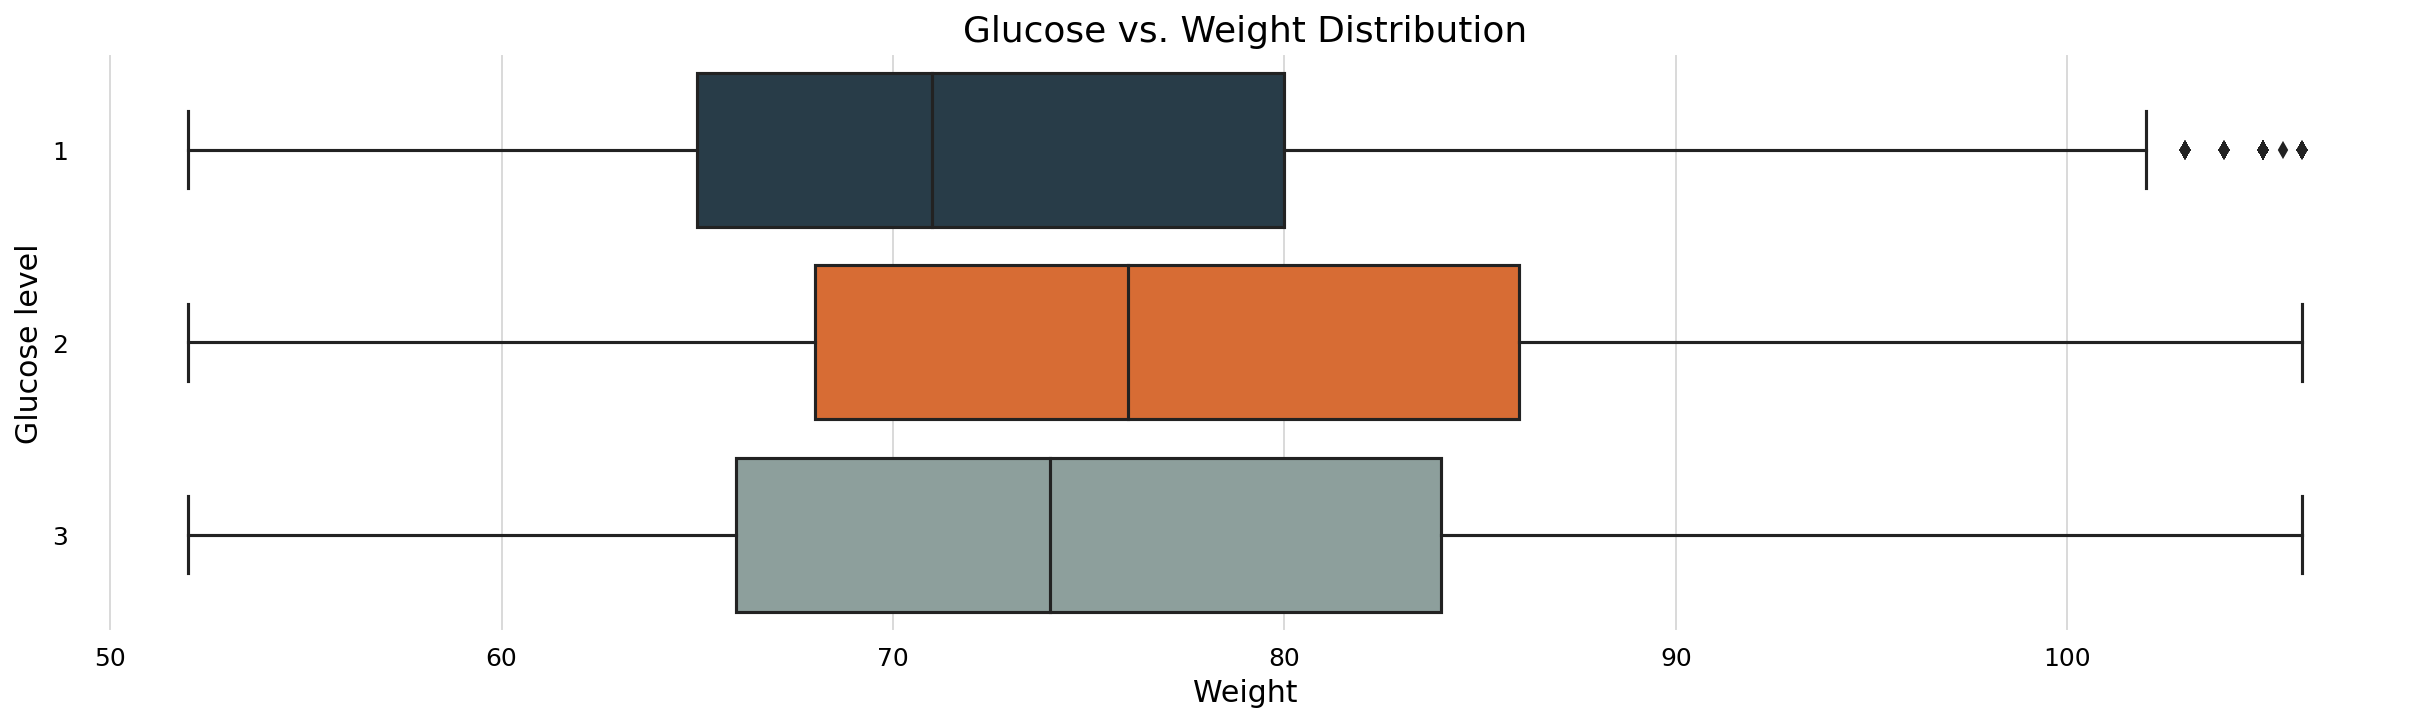

In [15]:
# Figure
fig_11 = sns.boxplot(data=data, x='weight', y='gluc', orient='horizontal')

# Customizing Figure
fig_11 = set_image(fig_11, 'Glucose vs. Weight Distribution', 'Weight', 'Glucose level')

## EDA Conclusions

- The older the people, the higher the risk of having a cardiovascular disease (CVD);
- The higher the cholesterol and glucose level, the higher the risk of having a CVD;
- The majority of people with "above normal" and "well above normal" level of cholesterol and glucose have CVD;
- There are no explicit correlations between height and CVD;
- Women in the dataset have a much higher consumption of alcohol than men;
- Men, on the other side, practice a lot more activities than the opposite gender;
- Smoking, in this dataset, is much more common for women than men;
- A lower percentage of men have CVD compared to women (17.0% vs. 32.2%);
- It is uncommon to be inactive and not have a cardiovascular problem (less than 1%);
- More than 40% of the dataset is active and does not have CVD;
- The regplots for Age vs. Blood Pressures show that the older people get, the higher their blood pressure (for Systolic and Diastolic);
- Glucose level 2 (above normal) has the highest median for weight on the dataset, followed by level 3 (well above normal) and by level 1 (normal).

*It is important to consider that there are almost double the size of women (39,564) than men (21,092) in this sample.